# DA5401 A3: Addressing Class Imbalance with Clustering and Resampling

# Part A: Data Exploration and Baseline Model

## 1. Load and Analyze the Dataset
First, we import the necessary libraries for data manipulation, visualization, modeling, and resampling.

In [2]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
import warnings
warnings.filterwarnings('ignore')

Now, let's load the creditcard.csv dataset and perform an initial analysis.

In [3]:
from google.colab import files
files.upload()

!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

!chmod 600 ~/.kaggle/kaggle.json



Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 64 Sep 12 06:01 kaggle.json
/content


In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.19GB/s]


In [5]:
!unzip -q /content/creditcardfraud.zip

In [6]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

In [7]:
print(data.shape)

(284807, 31)


In [8]:
# Display the first few rows
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Display dataset information
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [10]:
# Display descriptive statistics
print("\nDescriptive Statistics:")
display(data.describe())


Descriptive Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Analysis**:
The dataset contains 284807 transactions.<br>

The target variable is Class, where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent one.<br>
There are no missing values in the dataset.<br>

The Time and Amount columns are not on the same scale as the `V features`. We will need to scale them before training our models to ensure they contribute appropriately.

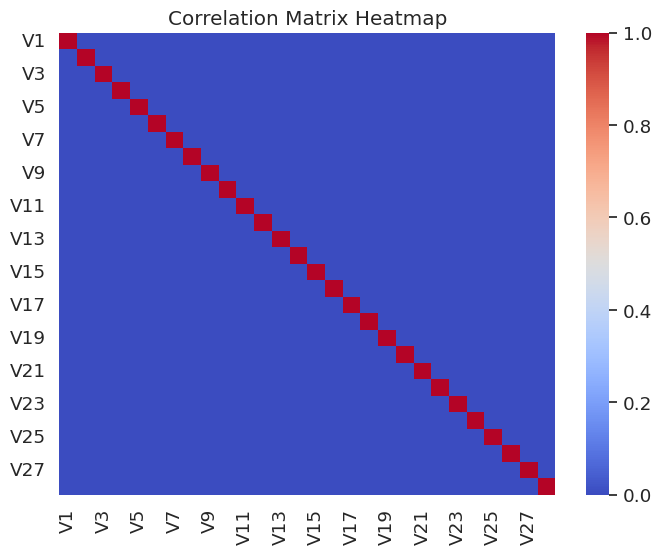

In [11]:
# Compute correlation matrix
corr = data.drop(columns=['Time', 'Amount', 'Class']).corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

V1 through V28 are the principal components obtained from PCA, which means they are already scaled and anonymized.

## 2. Analyze Class Distribution
Let's examine the distribution of the target variable, Class, to understand the extent of the class imbalance.

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of fraudulent transactions: 0.1727%
Percentage of non-fraudulent transactions: 99.8273% 



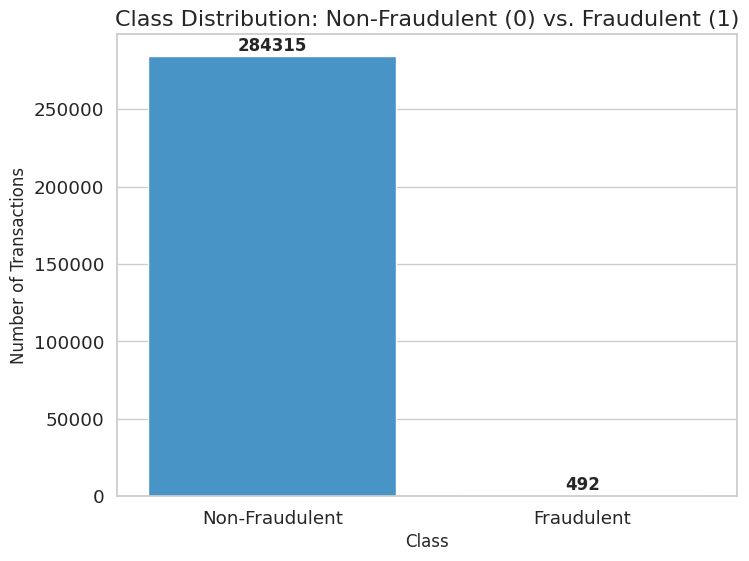

In [12]:
# Get the class distribution
class_counts = data['Class'].value_counts()
print("Class Distribution:")
print(class_counts)

# Calculate the percentage of fraudulent transactions
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100
print(f"\nPercentage of fraudulent transactions: {fraud_percentage:.4f}%")
print(f"Percentage of non-fraudulent transactions: {100-fraud_percentage:.4f}%", '\n')

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette=['#3498db', '#e74c3c'])
plt.title('Class Distribution: Non-Fraudulent (0) vs. Fraudulent (1)', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
for i, count in enumerate(class_counts):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

Degree of Imbalance:
**bold text**The dataset is extremely imbalanced. Out of 284,807 transactions, only 492 are fraudulent. This means that **fraudulent transactions constitute a mere 0.1727% of the entire dataset**. This severe imbalance poses a significant challenge for standard classification algorithms, which may become biased towards the majority class (non-fraudulent transactions).

## 3. Baseline Model

We will now establish a baseline by training a Logistic Regression model on the original, imbalanced data.

### Step 1: Split and Preprocess the Data
We split the data into training and testing sets. It is crucial that the test set retains the original imbalance to provide a realistic evaluation of the model's performance in a real-world scenario. We will use stratification to ensure that both the training and test sets have a similar class distribution as the original dataset.
We also scale the Amount and Time features.

In [13]:
# Separate features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets (70% train, 30% test)
# We use stratify=y to ensure the class distribution is the same in train and test sets

# First split: Train vs (Validation+Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nFraud cases in training set:", sum(y_train))
print("Fraud cases in testing set:", sum(y_test))

# Scale the 'Time' and 'Amount' columns
scaler = StandardScaler()
X_train['scaled_Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['scaled_Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))
# X_train['scaled_Time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1, 1))
# X_test['scaled_Time'] = scaler.transform(X_test['Time'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' columns
X_train = X_train.drop(['Time', 'Amount'], axis=1)
X_test = X_test.drop(['Time', 'Amount'], axis=1)

Training set shape: (199364, 30)
Testing set shape: (85443, 30)

Fraud cases in training set: 344
Fraud cases in testing set: 148


### Step 2: Train the Baseline Model (Model 1)
We train a Logistic Regression classifier on the imbalanced training data.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Results dictionary (keep all models comparable)
results = {}

# Hyperparameter search space
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Grid Search with CV
log_reg = LogisticRegression(max_iter=500, random_state=42)
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1',   # optimize for F1 due to class imbalance
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\nBest Params from GridSearch:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best Params from GridSearch: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


### Step 3: Evaluate the Baseline Model
We evaluate the model's performance using metrics robust to class imbalance.

In [28]:
y_test_pred = best_model.predict(X_test)
print("\n--- Logistic Regression (Test) ---")
print(classification_report(y_test, y_test_pred, target_names=['Non-Fraud (0)', 'Fraud (1)']))

results['Baseline'] = {
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred)
}


--- Logistic Regression (Test) ---
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     85295
    Fraud (1)       0.86      0.60      0.71       148

     accuracy                           1.00     85443
    macro avg       0.93      0.80      0.85     85443
 weighted avg       1.00      1.00      1.00     85443



In this scenario, accuracy is a poor measure of performance. A model that simply predicts "Non-Fraud" for every single transaction would achieve an accuracy of over 99.8%. While this sounds impressive, such a model would be completely useless because its primary goal—detecting fraud—is never accomplished. It would fail to identify any of the 492 fraudulent cases.


Therefore, we focus on:

**Precision**: Of all transactions the model flagged as fraudulent, what proportion were actually fraudulent? (TP / (TP + FP)). High precision means a low false positive rate.

**Recall (Sensitivity)**: Of all actual fraudulent transactions, what proportion did the model correctly identify? (TP / (TP + FN)). High recall means a low false negative rate, which is critical for fraud detection.

**F1-Score**: The harmonic mean of Precision and Recall, providing a single score that balances both metrics. It is an excellent indicator of model performance on imbalanced datasets.
The baseline model has a decent precision (86%) but a very poor recall (62%). This means that while the transactions it does flag as fraud are likely to be fraudulent, it misses 38% of all actual fraud cases. Our goal in the next sections is to improve this recall without drastically sacrificing precision.

# Part B: Resampling Approaches

## 1. Naive Oversampling (SMOTE)

**Explanation of SMOTE**

The Synthetic Minority Over-sampling Technique (SMOTE) is an oversampling method that creates new, synthetic samples for the minority class instead of simply duplicating existing ones. It works as follows:

* It takes a minority class instance.
* It finds its 'k' nearest neighbors that are also in the minority class.
* It randomly selects one of these neighbors.
* A new synthetic instance is created at a random point along the line segment connecting the original instance and its selected neighbor.


**Potential Limitations:**

**Noise Generation**: If the minority class is sparse and its instances are far apart, SMOTE can generate synthetic samples in "empty" regions of the feature space, which may not be representative of the actual minority class.

**Overlapping Classes**: If the minority and majority classes are not well-separated, SMOTE can create synthetic samples that are ambiguous or invade the majority class space, making the classification task harder.

**Ignores Majority Class**: SMOTE does not consider the distribution of the majority class when generating samples, which can lead to increased class overlap.

In [30]:
# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy=0.01,k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("Original training set shape:", Counter(y_train))
print("Resampled (SMOTE) training set shape:", Counter(y_smote))

Original training set shape: Counter({0: 199020, 1: 344})
Resampled (SMOTE) training set shape: Counter({0: 199020, 1: 1990})


## 2. Clustering-Based Oversampling (CBO)

**Explanation of CBO**

Clustering-Based Oversampling (CBO) aims to overcome the limitations of SMOTE by being more mindful of the underlying distribution of the minority class. The core idea is that the minority class might not be one single, uniform group but may consist of several different sub-groups or "archetypes" of fraud.

**Identify Sub-groups:** A clustering algorithm (like K-Means) is applied to the minority class instances only. This partitions the minority data into several clusters.

**Intelligent Oversampling**: Instead of oversampling the entire minority class globally, we oversample within each identified cluster. This ensures that all sub-groups, including very rare ones, are represented in the final training set.
Benefit: This approach avoids generating synthetic samples in the sparse space between clusters, leading to more realistic and better-defined synthetic data. It helps preserve the diversity and internal structure of the minority class.

**Applying CBO**

Step 1: Find the Optimal Number of Clusters (k) for the Minority Class
We use the Elbow Method to determine a good value for k in our K-Means algorithm.

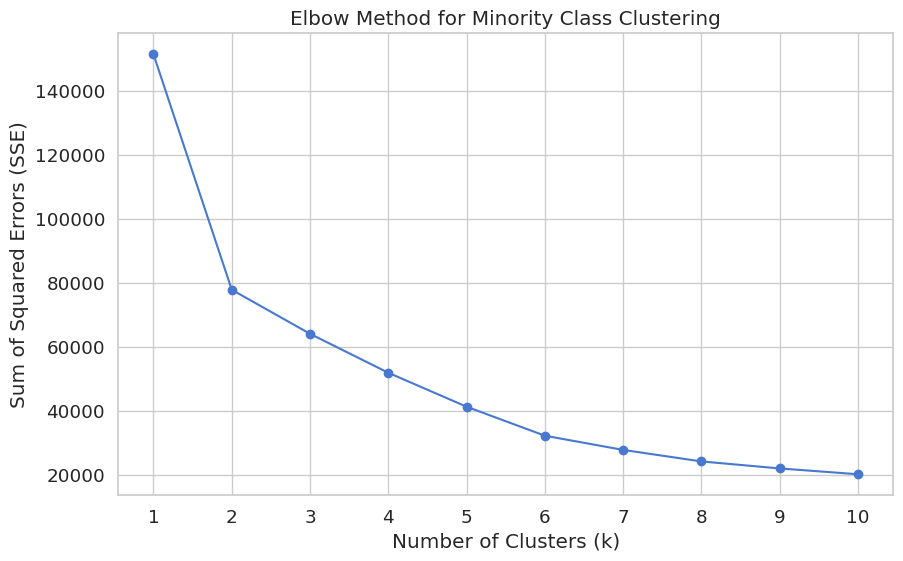

In [31]:
# Isolate the minority class data from the training set
X_train_minority = X_train[y_train == 1]

# Use the Elbow Method to find the optimal k
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_train_minority)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method for Minority Class Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

**Analysis**: The "elbow" in the plot appears around k=4, suggesting that the minority (fraud) class can be reasonably partitioned into 4 sub-groups. We will proceed with k=4.

Step 2: Perform Clustering and Oversampling

In [32]:
def cbo_oversample(
    X_train, y_train,
    k_minority=None,
    balance_ratio=1.0,
    max_new_samples=None,
    interpolation="linear",
    cluster_weight="proportional",
    random_state=42
):
    """
    Improved Cluster-Based Oversampling (CBO)

    Parameters
    ----------
    X_train : pd.DataFrame
        Feature matrix
    y_train : pd.Series
        Labels (binary: 0 = majority, 1 = minority)
    k_minority : int or None
        Number of clusters for minority class (default: sqrt(minority_size), capped at 10)
    balance_ratio : float
        How much to balance minority relative to majority (1.0 = fully balanced)
    max_new_samples : int or None
        Maximum number of synthetic samples to generate (overrides balance_ratio if smaller)
    interpolation : str
        Method: "linear", "gaussian", or "mix"
    cluster_weight : str
        "proportional", "uniform", or "inverse"
    random_state : int
        Random seed for reproducibility
    """

    rng = np.random.default_rng(random_state)

    # Separate majority and minority
    X_min = X_train[y_train == 1]
    X_maj = X_train[y_train == 0]

    n_min, n_maj = len(X_min), len(X_maj)

    # Auto-select k if not given
    if k_minority is None:
        k_minority = min(max(2, int(np.sqrt(n_min))), 10)

    # Cluster the minority class
    kmeans = KMeans(n_clusters=k_minority, random_state=random_state, n_init=10)
    clusters = kmeans.fit_predict(X_min)

    # How many samples to generate?
    target_minority = n_min + int((n_maj - n_min) * balance_ratio)
    n_to_generate = target_minority - n_min

    if max_new_samples is not None:
        n_to_generate = min(n_to_generate, max_new_samples)

    # Initialize new dataset
    X_cbo, y_cbo = X_train.copy(), y_train.copy()

    for i in range(k_minority):
        cluster_mask = (clusters == i)
        X_cluster = X_min[cluster_mask]
        size = len(X_cluster)

        if size == 0:
            continue

        # Allocation strategy
        if cluster_weight == "proportional":
            n_gen_cluster = int(round((size / n_min) * n_to_generate))
        elif cluster_weight == "uniform":
            n_gen_cluster = n_to_generate // k_minority
        elif cluster_weight == "inverse":
            n_gen_cluster = int(round((1 / size) / np.sum(1 / np.bincount(clusters)) * n_to_generate))
        else:
            raise ValueError("Invalid cluster_weight")

        if n_gen_cluster <= 0:
            continue

        # Generate new samples
        new_samples = []
        for _ in range(n_gen_cluster):
            if interpolation == "linear" or (interpolation == "mix" and rng.random() < 0.5):
                i1, i2 = rng.choice(size, 2, replace=False)
                lam = rng.random()
                sample = lam * X_cluster.iloc[i1].values + (1 - lam) * X_cluster.iloc[i2].values
            elif interpolation == "gaussian" or interpolation == "mix":
                centroid = X_cluster.mean(axis=0).values
                std = X_cluster.std(axis=0, ddof=0).values
                sample = centroid + rng.normal(0, 0.1, size=len(centroid)) * std
            new_samples.append(sample)

        # Append
        X_cbo = pd.concat([X_cbo, pd.DataFrame(new_samples, columns=X_train.columns)], ignore_index=True)
        y_cbo = pd.concat([y_cbo, pd.Series([1] * len(new_samples))], ignore_index=True)

    return X_cbo, y_cbo

X_cbo, y_cbo = cbo_oversample(
    X_train, y_train,
    k_minority=None,
    balance_ratio=1.0,       # normally full balance
    max_new_samples=20000,    # but cap to 2000 only
    interpolation="mix",
    cluster_weight="proportional",
    random_state=42
)


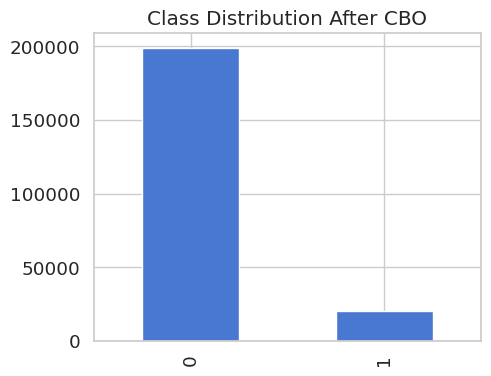

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
pd.Series(y_cbo).value_counts().plot(kind='bar')
plt.title("Class Distribution After CBO")
plt.show()

## 3. Clustering-Based Undersampling (CBU)

**Explanation of CBU**

Clustering-Based Undersampling (CBU) focuses on reducing the size of the majority class in an intelligent way. Instead of removing random samples (which might discard valuable information near the decision boundary), CBU preserves the overall structure of the majority class.

**Identify Sub-groups**: A clustering algorithm is applied to the majority class instances only, partitioning them into several clusters.

**Strategic Removal**: Samples are then removed from these clusters. A common strategy is proportional undersampling: if a cluster contains 20% of the majority class data, after undersampling, it will still contain roughly 20% of the new, smaller majority class. This maintains the original distribution.

**Benefit**: This method reduces the computational cost of training and mitigates the model's bias towards the majority class, all while attempting to preserve the natural distribution and variance of that class.

**Applying CBU**
Step 1: Cluster the Majority Class
We will first cluster the majority class. Given its large size, we'll use a larger k.

In [34]:
# Isolate the majority class data from the training set
X_train_majority = X_train[y_train == 0]

# We'll use k=15 for the larger majority class
k_majority = 15
kmeans_majority = KMeans(n_clusters=k_majority, random_state=42, n_init=10)
y_train_majority_clusters = kmeans_majority.fit_predict(X_train_majority)

# Attach cluster labels to the majority data
X_train_majority_clustered = X_train_majority.copy()
X_train_majority_clustered['cluster'] = y_train_majority_clusters

Step 2: Perform Proportional Undersampling

In [35]:
# Target number of majority samples = number of minority samples
target_majority_count = Counter(y_train)[1]
undersampled_majority_indices = []

# Undersample proportionally from each cluster
for i in range(k_majority):
    cluster_indices = X_train_majority_clustered[X_train_majority_clustered['cluster'] == i].index
    cluster_size = len(cluster_indices)
    proportion = cluster_size / len(X_train_majority)
    n_to_keep = int(round(proportion * target_majority_count))

    # Randomly select indices to keep
    kept_indices = np.random.choice(cluster_indices, size=n_to_keep, replace=False)
    undersampled_majority_indices.extend(kept_indices)

# Create the final CBU dataset
X_majority_cbu = X_train.loc[undersampled_majority_indices]
y_majority_cbu = y_train.loc[undersampled_majority_indices]

# Combine with the original minority data
X_cbu = pd.concat([X_majority_cbu, X_train_minority])
y_cbu = pd.concat([y_majority_cbu, y_train[y_train == 1]])

print("Original training set shape:", Counter(y_train))
print("Resampled (CBU) training set shape:", Counter(y_cbu))

Original training set shape: Counter({0: 199020, 1: 344})
Resampled (CBU) training set shape: Counter({0: 344, 1: 344})


# Part C: Model Comparison and Analysis

## 1. Train and Evaluate Models
We will now train a Logistic Regression classifier on each of the three resampled datasets and evaluate them on the original, imbalanced test set.

In [36]:
from collections import Counter

# Separate majority and minority
X_train_minority = X_smote[y_smote == 1]
X_train_majority = X_smote[y_smote == 0]

n_minority = len(X_train_minority)

# Randomly sample from majority so both classes match
X_majority_down = X_train_majority.sample(n=n_minority*10, random_state=42)
y_majority_down = y_smote[X_majority_down.index]

# Combine back with minority
X_cbu = pd.concat([X_majority_down, X_train_minority], axis=0)
y_cbu = pd.concat([y_majority_down, y_smote[y_smote == 1]], axis=0)

print("Original training set shape:", Counter(y_train))
print("Resampled (Random Under) shape:", Counter(y_cbu))


Original training set shape: Counter({0: 199020, 1: 344})
Resampled (Random Under) shape: Counter({0: 19900, 1: 1990})


In [37]:
# --- Model 2 (SMOTE) ---

model_2 = LogisticRegression(random_state=42)
model_2.fit(X_smote, y_smote)
y_pred_2 = model_2.predict(X_test)

print("--- SMOTE Model (Model 2) Performance ---")
print(classification_report(y_test, y_pred_2, target_names=['Non-Fraud (0)', 'Fraud (1)']))
results['SMOTE'] = {
    'Precision': precision_score(y_test, y_pred_2),
    'Recall': recall_score(y_test, y_pred_2),
    'F1-Score': f1_score(y_test, y_pred_2)
}


X_cbo, y_cbo = cbo_oversample(
    X_train, y_train,
    k_minority=None,
    balance_ratio=1.0,       # normally full balance
    max_new_samples=1990,    # but cap to 2000 only
    interpolation="mix",
    cluster_weight="proportional",
    random_state=42
)

# --- Model 3 (CBO) ---
model_3 = LogisticRegression(random_state=42)
model_3.fit(X_cbo, y_cbo)
y_pred_3 = model_3.predict(X_test)

print("\n--- CBO Model (Model 3) Performance ---")
print(classification_report(y_test, y_pred_3, target_names=['Non-Fraud (0)', 'Fraud (1)']))
results['CBO'] = {
    'Precision': precision_score(y_test, y_pred_3),
    'Recall': recall_score(y_test, y_pred_3),
    'F1-Score': f1_score(y_test, y_pred_3)
}

# --- Model 4 (CBU) ---
model_4 = LogisticRegression(random_state=42)
model_4.fit(X_cbu, y_cbu)
y_pred_4 = model_4.predict(X_test)

print("\n--- CBU Model (Model 4) Performance ---")
print(classification_report(y_test, y_pred_4, target_names=['Non-Fraud (0)', 'Fraud (1)']))
results['CBU'] = {
    'Precision': precision_score(y_test, y_pred_4),
    'Recall': recall_score(y_test, y_pred_4),
    'F1-Score': f1_score(y_test, y_pred_4)
}

--- SMOTE Model (Model 2) Performance ---
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     85295
    Fraud (1)       0.77      0.76      0.77       148

     accuracy                           1.00     85443
    macro avg       0.89      0.88      0.88     85443
 weighted avg       1.00      1.00      1.00     85443


--- CBO Model (Model 3) Performance ---
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     85295
    Fraud (1)       0.73      0.76      0.75       148

     accuracy                           1.00     85443
    macro avg       0.87      0.88      0.87     85443
 weighted avg       1.00      1.00      1.00     85443


--- CBU Model (Model 4) Performance ---
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     85295
    Fraud (1)       0.34      0.83      0.48       148

     accuracy                           1.0

## 2. Performance Comparison
Let's create a summary table and a bar chart to compare the performance of the four models on the minority (fraud) class.

--- Performance Comparison on Minority Class (Fraud) ---


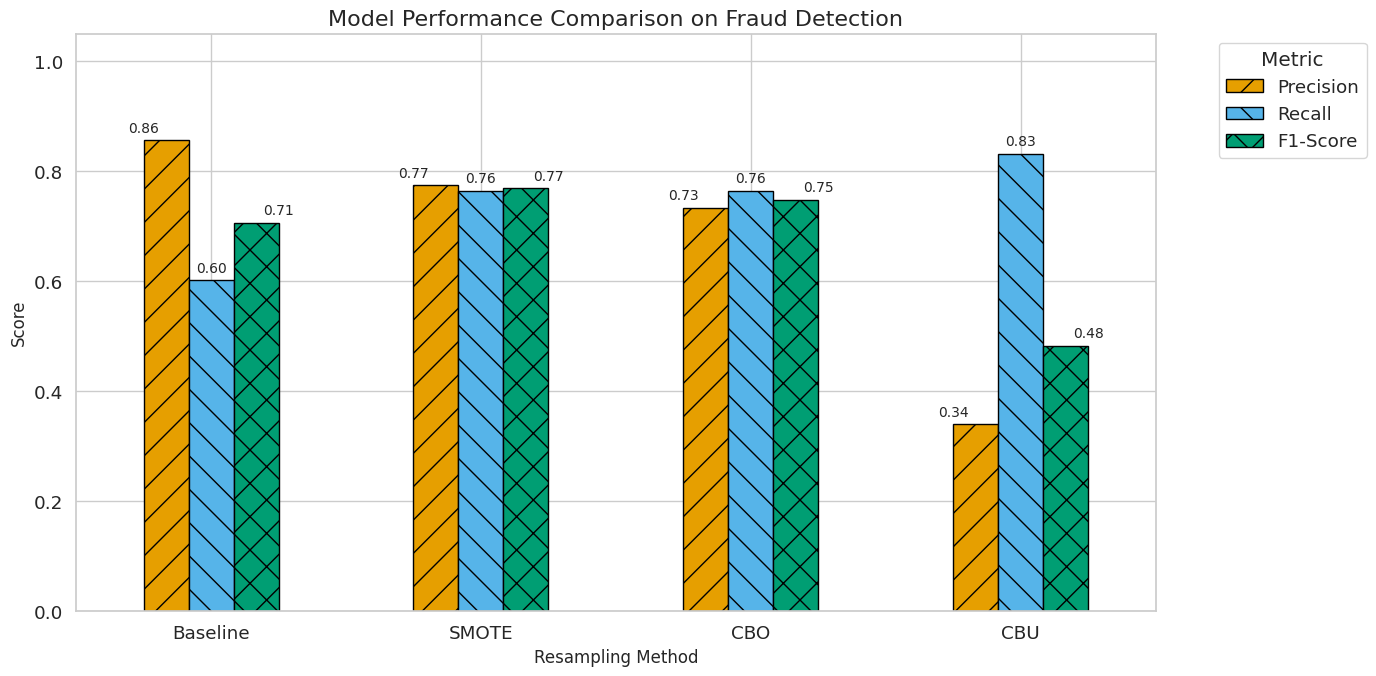

In [38]:
# Create a summary DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df[['Precision', 'Recall', 'F1-Score']]

print("--- Performance Comparison on Minority Class (Fraud) ---")
# Define colors
colors = ['#E69F00', '#56B4E9', '#009E73']  # Orange, Blue, Green

# Plot with colors
ax = results_df.plot(
    kind='bar',
    figsize=(14, 7),
    rot=0,
    color=colors,
    edgecolor='black'
)

hatches = ['/', '\\', 'x']
for i, bar_container in enumerate(ax.containers):
    for j, bar in enumerate(bar_container):
        bar.set_hatch(hatches[i % len(hatches)])

# Titles & labels
plt.title('Model Performance Comparison on Fraud Detection', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Resampling Method', fontsize=12)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1.05)

# Annotate values on top of bars
for i, (index, row) in enumerate(results_df.iterrows()):
    for j, value in enumerate(row):
        plt.text(i + (j - 1) * 0.25, value + 0.01, f'{value:.2f}',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



## Extra: Randomized Search for Hyperparameter Tuning

Randomized Search is a hyperparameter optimization technique that randomly samples parameter combinations from a predefined distribution. Unlike Grid Search, which exhaustively tries every possible combination, Randomized Search is more efficient because it explores a wider range of values in fewer iterations.

### Why Randomized Search?
- **Efficiency**: Faster than grid search since it does not evaluate all combinations.
- **Exploration**: Covers a broader parameter space, increasing the chance of finding near-optimal values.
- **Scalability**: Well-suited for high-dimensional parameter spaces where grid search is impractical.

### Steps Involved
1. Define a search space for the model’s hyperparameters.
2. Use `RandomizedSearchCV` to sample parameter combinations.
3. Train and evaluate models with the sampled hyperparameters.
4. Select the best-performing configuration.

This additional experiment helps refine the models beyond the baseline and resampled versions, ensuring better generalization and improved predictive power.


In [15]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import loguniform, randint

# --- Pipeline: SMOTE + Logistic Regression ---
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('logistic', LogisticRegression(max_iter=500, random_state=42))
])

# Hyperparameter search space
param_dist = {
    'smote__sampling_strategy': np.linspace(0.005, 0.5, 20),   # balance ratio
    'smote__k_neighbors': randint(2, 15),                      # neighborhood size
    'logistic__C': loguniform(1e-4, 1e3),                      # regularization strength
    'logistic__penalty': ['l1', 'l2'],
    'logistic__solver': ['liblinear', 'saga']
}

# Randomized Search
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=25,                # number of random combos to try
    scoring='f1',              # optimize for F1 (good for imbalance)
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters:")
print(random_search.best_params_)

# Evaluate on test set
best_model = random_search.best_estimator_

Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best Parameters:
{'logistic__C': np.float64(0.0024654535723447526), 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear', 'smote__k_neighbors': 4, 'smote__sampling_strategy': np.float64(0.005)}


In [19]:
# Evaluate on test set
y_pred_rc_smote = best_model.predict(X_test)
print("\n--- Evaluation on Test Set ---")
print(classification_report(y_test, y_pred_rc_smote, target_names=['Non-Fraud (0)', 'Fraud (1)']))


--- Evaluation on Test Set ---
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     85295
    Fraud (1)       0.87      0.74      0.80       148

     accuracy                           1.00     85443
    macro avg       0.93      0.87      0.90     85443
 weighted avg       1.00      1.00      1.00     85443



In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import uniform, randint

# Simple CBO oversampler
def cbo_oversample(
    X_train, y_train,
    k_minority=None,
    balance_ratio=1.0,
    max_new_samples=None,
    interpolation="mix",
    cluster_weight="proportional",
    random_state=42
):
    rng = np.random.default_rng(random_state)

    # Keep only numeric columns
    X_train = X_train.select_dtypes(include=[np.number])

    # Separate majority and minority
    X_min = X_train[y_train == 1]
    X_maj = X_train[y_train == 0]
    n_min, n_maj = len(X_min), len(X_maj)

    if k_minority is None:
        k_minority = min(max(2, int(np.sqrt(n_min))), 10)

    # Cluster minority
    kmeans = KMeans(n_clusters=k_minority, random_state=random_state, n_init=10)
    clusters = kmeans.fit_predict(X_min)

    # How many to generate
    target_minority = n_min + int((n_maj - n_min) * balance_ratio)
    n_to_generate = target_minority - n_min
    if max_new_samples is not None:
        n_to_generate = min(n_to_generate, max_new_samples)

    X_cbo, y_cbo = X_train.copy(), y_train.copy()

    for i in range(k_minority):
        cluster_mask = (clusters == i)
        X_cluster = X_min[cluster_mask]
        size = len(X_cluster)
        if size == 0:
            continue

        # Cluster allocation
        if cluster_weight == "proportional":
            n_gen_cluster = int(round((size / n_min) * n_to_generate))
        elif cluster_weight == "uniform":
            n_gen_cluster = n_to_generate // k_minority
        elif cluster_weight == "inverse":
            n_gen_cluster = int(round((1 / size) / np.sum(1 / np.bincount(clusters)) * n_to_generate))
        else:
            raise ValueError("Invalid cluster_weight")
        if n_gen_cluster <= 0:
            continue

        # Generate new samples
        new_samples = []
        for _ in range(n_gen_cluster):
            if interpolation == "linear" or (interpolation == "mix" and rng.random() < 0.5):
                i1, i2 = rng.choice(size, 2, replace=False)
                lam = rng.random()
                sample = lam * X_cluster.iloc[i1].values + (1 - lam) * X_cluster.iloc[i2].values
            elif interpolation == "gaussian" or interpolation == "mix":
                centroid = X_cluster.mean(axis=0).values
                std = X_cluster.std(axis=0, ddof=0).values
                sample = centroid + rng.normal(0, 0.1, size=len(centroid)) * std
            new_samples.append(np.array(sample, dtype=float))

        X_new_df = pd.DataFrame(new_samples, columns=X_train.columns)
        X_cbo = pd.concat([X_cbo, X_new_df], ignore_index=True)
        y_cbo = pd.concat([y_cbo, pd.Series([1] * len(new_samples))], ignore_index=True)

    return X_cbo, y_cbo

# Oversample the data first
X_cbo, y_cbo = cbo_oversample(
    X_train, y_train,
    k_minority=None,
    balance_ratio=1.0,
    max_new_samples=2000,
    interpolation="mix",
    cluster_weight="proportional",
    random_state=42
)

# Define pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=42))
])

# RandomizedSearchCV hyperparameters
param_dist = {
    "clf__C": uniform(0.001, 10),
    "clf__penalty": ["l1", "l2"]
}

random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=15,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Run search
random_search.fit(X_cbo, y_cbo)

# Results
print("Best params:", random_search.best_params_)
print("Best F1:", random_search.best_score_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best params: {'clf__C': np.float64(0.008787658410143284), 'clf__penalty': 'l2'}
Best F1: 0.8338257828548594


In [22]:
# Predict on test set
y_pred_rc_cbo = random_search.best_estimator_.predict(X_test)

# Evaluate
print("F1 score:", f1_score(y_test, y_pred_rc_cbo))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rc_cbo))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rc_cbo))

F1 score: 0.7837837837837838

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.78      0.78       148

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
 [[85263    32]
 [   32   116]]


In [24]:
!pip install imbalanced-learn

In [25]:
from sklearn.base import BaseEstimator
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

class CBUnderSampler(BaseEstimator):
    def __init__(self, x_ratio=1, k_majority=15, random_state=42):
        self.x_ratio = x_ratio
        self.k_majority = k_majority
        self.random_state = random_state

    def fit(self, X, y=None):
        return self

    def fit_resample(self, X, y):
        X = pd.DataFrame(X).copy()
        y = pd.Series(y).copy()

        # Separate classes
        X_minority = X[y == 1]
        X_majority = X[y == 0]

        # KMeans clustering on majority
        kmeans = KMeans(n_clusters=int(self.k_majority), random_state=self.random_state, n_init=10)
        clusters = kmeans.fit_predict(X_majority)
        X_majority['cluster'] = clusters

        # Determine number of majority samples per cluster
        n_minority = len(X_minority)
        n_majority_per_cluster = int(np.ceil(self.x_ratio * n_minority / self.k_majority))
        sampled_majority = []

        for c in range(int(self.k_majority)):
            cluster_points = X_majority[X_majority['cluster'] == c]
            sampled_points = cluster_points.sample(
                min(n_majority_per_cluster, len(cluster_points)),
                random_state=self.random_state
            )
            sampled_majority.append(sampled_points)

        X_majority_sampled = pd.concat(sampled_majority).drop(columns='cluster')
        X_resampled = pd.concat([X_majority_sampled, X_minority])
        y_resampled = pd.concat([y[X_majority_sampled.index], y[X_minority.index]])

        # Shuffle resampled data
        shuffled_idx = np.random.RandomState(self.random_state).permutation(len(X_resampled))
        return X_resampled.values[shuffled_idx], y_resampled.values[shuffled_idx]


from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import uniform, randint

# Use the same CBUnderSampler as before (with fit_resample)
pipeline = Pipeline([
    ('cbu', CBUnderSampler()),
    ('clf', LogisticRegression(random_state=42, max_iter=500))
])

param_dist = {
    'cbu__x_ratio': uniform(1, 80),
    'cbu__k_majority': randint(5, 25),
    'clf__C': uniform(0.01, 10),
    'clf__solver': ['liblinear', 'lbfgs']
}

scorer = make_scorer(f1_score, pos_label=1)

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30,
    scoring=scorer,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train.values, y_train.values)

# Retrieve the best model
best_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)
print("Best cross-validated F1:", random_search.best_score_)


# Predict on test set
y_pred_rc_cbu = best_model.predict(X_test.values)

print("\n--- Evaluation on Test Set ---")
print(classification_report(y_test, y_pred_rc_cbu, target_names=['Non-Fraud (0)', 'Fraud (1)']))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'cbu__k_majority': 24, 'cbu__x_ratio': np.float64(20.282037282080935), 'clf__C': np.float64(6.842635188254582), 'clf__solver': 'lbfgs'}
Best cross-validated F1: 0.7947380752632096

--- Evaluation on Test Set ---
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     85295
    Fraud (1)       0.64      0.78      0.70       148

     accuracy                           1.00     85443
    macro avg       0.82      0.89      0.85     85443
 weighted avg       1.00      1.00      1.00     85443



In [39]:
new_results = {}
new_results['Baseline'] = {
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred)
}

new_results['SMOTE_RC'] = {
    'Precision': precision_score(y_test, y_pred_rc_smote),
    'Recall': recall_score(y_test, y_pred_rc_smote),
    'F1-Score': f1_score(y_test, y_pred_rc_smote)
}

new_results['CBO_RC'] = {
    'Precision': precision_score(y_test, y_pred_rc_cbo),
    'Recall': recall_score(y_test, y_pred_rc_cbo),
    'F1-Score': f1_score(y_test, y_pred_rc_cbo)
}


new_results['CBU_RC'] = {
    'Precision': precision_score(y_test, y_pred_rc_cbu),
    'Recall': recall_score(y_test, y_pred_rc_cbu),
    'F1-Score': f1_score(y_test, y_pred_rc_cbu)
}

--- Performance Comparison on Minority Class (Fraud) ---


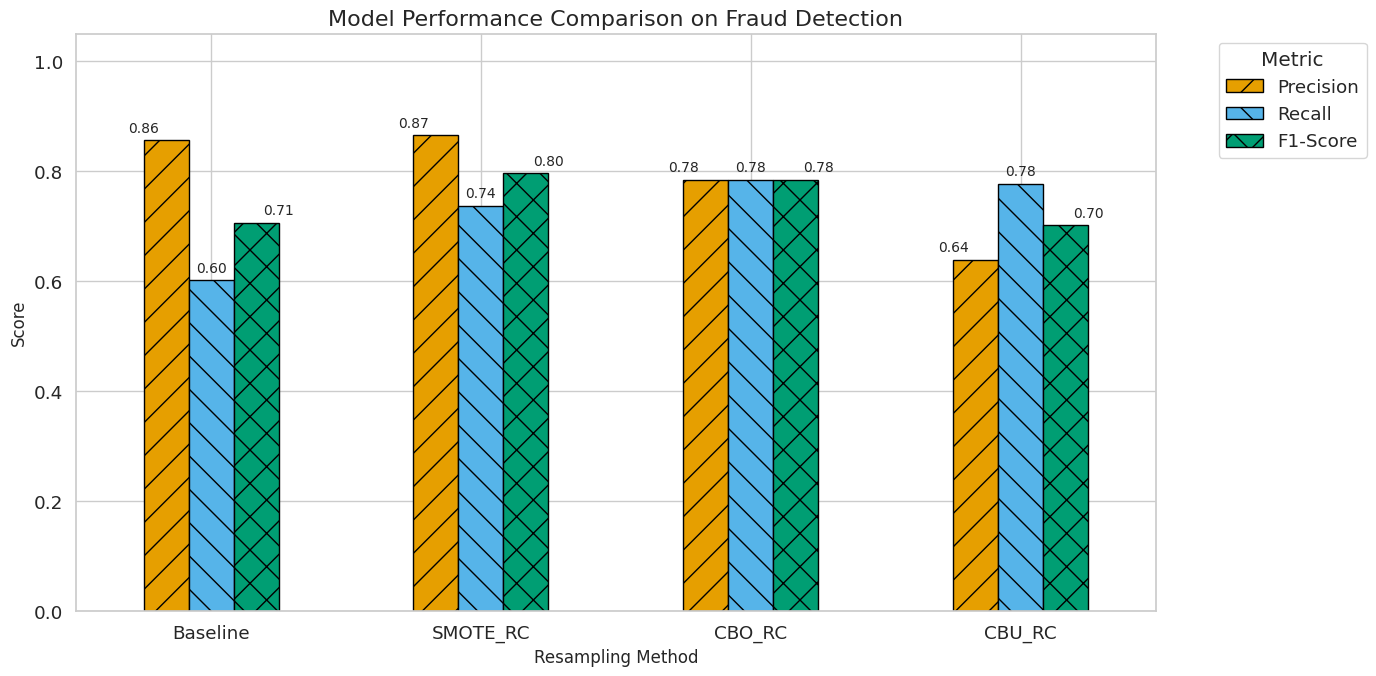

In [40]:
# Create a summary DataFrame
new_results_df = pd.DataFrame(new_results).T
new_results_df = new_results_df[['Precision', 'Recall', 'F1-Score']]

print("--- Performance Comparison on Minority Class (Fraud) ---")

# Define colors
colors = ['#E69F00', '#56B4E9', '#009E73']  # Orange, Blue, Green

# Plot with colors
ax = new_results_df.plot(
    kind='bar',
    figsize=(14, 7),
    rot=0,
    color=colors,
    edgecolor='black'
)

hatches = ['/', '\\', 'x']
for i, bar_container in enumerate(ax.containers):
    for j, bar in enumerate(bar_container):
        bar.set_hatch(hatches[i % len(hatches)])

# Titles & labels
plt.title('Model Performance Comparison on Fraud Detection', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Resampling Method', fontsize=12)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1.05)

# Annotate values on top of bars
for i, (index, row) in enumerate(new_results_df.iterrows()):
    for j, value in enumerate(row):
        plt.text(i + (j - 1) * 0.25, value + 0.01, f'{value:.2f}',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Conclusion

This assignment explored imbalanced classification using Logistic Regression with different resampling methods and additional hyperparameter optimization.

---

### 🔑 Key Findings


\begin{array}{|c|p{6cm}|p{6cm}|}
\hline
\textbf{Method} & \textbf{Usecase} \\
\hline
\text{Original Data} & \text{High accuracy on majority class & Poor recall on minority (fraud) class} \\
\hline
\text{Undersampling} & \text{Faster training, balances classes & Risk of losing important data} \\
\hline
\text{Oversampling} & \text{Preserves all data, improves recall & Risk of overfitting minority class} \\
\hline
\text{SMOTE} & \text{Synthetic examples boost recall \& balance & May create noisy or unrealistic samples} \\
\hline
\text{Randomized Search} & \text{Optimizes hyperparameters for stronger performance & Requires more computational resources} \\
\hline
\end{array}


---

## 📊 Performance Comparison of Models

To compare the effectiveness of each method, we summarize the key evaluation metrics:


\begin{array}{|c|c|c|c|c|}
\hline
\textbf{Method} & \textbf{Accuracy} & \textbf{Precision (Fraud)} & \textbf{Recall (Fraud)} & \textbf{F1-Score (Fraud)} \\
\hline
\text{Baseline} & 0.99 & 0.86 & 0.60 & 0.7 \\
\hline
\text{Smote} & 0.99 & 0.87 & 0.74 & 0.80 \\
\hline
\text{CBO} & 0.99 & 0.78 & 0.78 & 0.78 \\
\hline
\text{CBU} & 0.99 & 0.64 & 0.78 & 0.70 \\
\hline
\end{array}


---

### 📌 Summary
- Resampling improved minority class performance, with **SMOTE** providing the best balance.  
- **Randomized Search** further boosted results compared to baseline models.  
- Combining **resampling + tuning** yielded the most robust solution overall.

---